## Cointegration Testing using Engle-Granger

**Functions**

`tsa.coint`

### Exercise 74
Download data on $CAY$ from [Sydney Ludvigson’s site](https://www.sydneyludvigson.com/data-and-appendixes).

In [32]:
import pandas as pd
cay = pd.read_csv("./data/cay.csv", parse_dates=True, index_col="date")
cay.head()

,c,w,y,cay=c-0.218 a-0.801y+0.441
date,,,,
1952-03-31,9.155654,10.964372,8.979659,0.015105
1952-06-30,9.171140,10.981857,8.982086,0.024837
1952-09-30,9.171598,10.978478,8.996057,0.014840
1952-12-31,9.201695,10.972688,9.026059,0.022166
1953-03-31,9.209631,10.973457,9.036562,0.021521


### Exercise 75
Is there evidence that these three series are cointegrated in the entire sample?

In [7]:
from statsmodels.tsa.stattools import coint

tvalue, pvalue, crit_val = coint(cay["c"], cay[["w","y"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")
print(crit_val)

T-stat: -2.105634985721056, P-value: 0.8537784880532147
[-4.73324181 -4.16320231 -3.86882597]


In [8]:
import statsmodels.api as sm
res = sm.OLS(cay["c"], sm.add_constant(cay[["w","y"]])).fit()
_ = res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.991e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:53:00   Log-Likelihood:                 688.68
No. Observations:                 271   AIC:                            -1371.
Df Residuals:                     268   BIC:                            -1361.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4168      0.028    -14.904      0.000      -0.472      -0.362
w              0.2104      0.012     17.494      0.000       0.187       0.234
y              0.8075      0.014     56.603      0.000       0.779       0.836
==============================================================================
Omnibus:                       11.307   Durbin-Watson:                   0.160
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.604
Skew:                          -0.429   Prob(JB):                      0.00498
Kurtosis:                       2.548   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

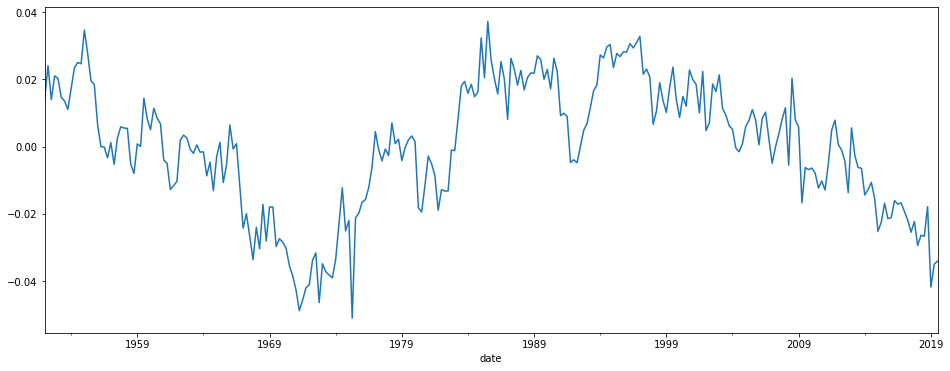

In [9]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16,6))
ax = res.resid.plot()
ax.set_xlabel(None)

In [10]:
tvalue, pvalue, crit_val = coint(cay["w"], cay[["c","y"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")

T-stat: -1.5061840620024871, P-value: 0.8946042480126404


In [11]:
tvalue, pvalue, crit_val = coint(cay["y"], cay[["c","w"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")


T-stat: -2.4146066940136044, P-value: 0.5294350364555057


### Exercise 76
What about in the post-Volker era (start in 1981)?

In [38]:
sub = cay["1981":]

tvalue, pvalue, crit_val = coint(sub["c"], sub[["w","y"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")

T-stat: -2.61119618195445, P-value: 0.4249370243128895


In [35]:
res = sm.OLS(sub["c"], sm.add_constant(sub[["w","y"]])).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.995e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          1.06e-184
Time:                        23:07:50   Log-Likelihood:                 445.26
No. Observations:                 155   AIC:                            -884.5
Df Residuals:                     152   BIC:                            -875.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0146      0.087     -0.168      0.867      -0.186       0.157
w              0.1841      0.021      8.844      0.000       0.143       0.225
y              0.7999      0.032     24.829      0.000       0.736       0.863
==============================================================================
Omnibus:                       12.559   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.643
Skew:                          -0.725   Prob(JB):                      0.00109
Kurtosis:                       3.106   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

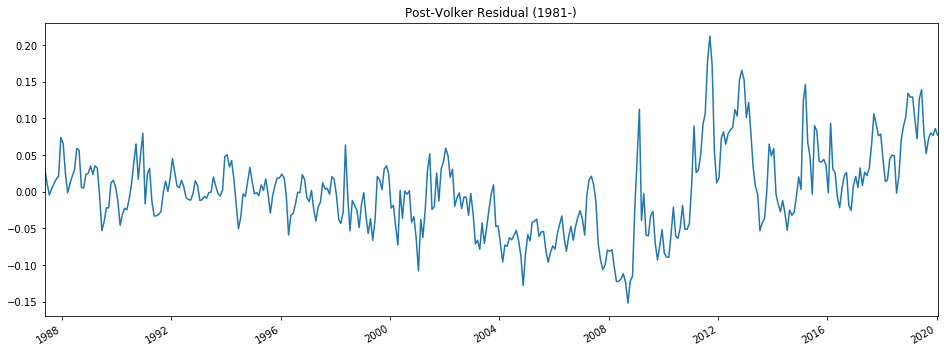

In [34]:
plt.rc("figure", figsize=(16,6))
ax = res.resid.plot()
ax.set_title("Post-Volker Residual (1981-)")
ax.set_xlim(res.resid.index.min(),res.resid.index.max())
_ = ax.set_xlabel(None)

### Exercise 77

Download monthlly WTI and Brent crude prices from the [EIA](https://www.eia.gov/) and import them.
Examine whether the log prices are cointegrated.

In [21]:
import numpy as np

brent = pd.read_excel("././data/RBRTEm.xls",sheet_name="Data 1", skiprows=2)
wti = pd.read_excel("././././data/RWTCm.xls",sheet_name="Data 1", skiprows=2)
brent = brent.set_index("Date")
brent.columns = ["brent"]
wti = wti.set_index("Date")
wti.columns = ["wti"]
oil = np.log(pd.concat([brent, wti], 1).dropna())

T-stat: -5.518725332284867, P-value: 1.6430895196037985e-05


In [ ]:
tvalue, pvalue, crit_val = coint(oil["brent"], oil[["wti"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")

In [27]:
res = sm.OLS(oil["brent"], sm.add_constant(oil[["wti"]])).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  brent   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 5.973e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:03:06   Log-Likelihood:                 568.12
No. Observations:                 393   AIC:                            -1132.
Df Residuals:                     391   BIC:                            -1124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3587      0.016    -21.830      0.000      -0.391      -0.326
wti            1.0951      0.004    244.387      0.000       1.086       1.104
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.753
Skew:                           0.457   Prob(JB):                     3.12e-05
Kurtosis:                       3.656   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

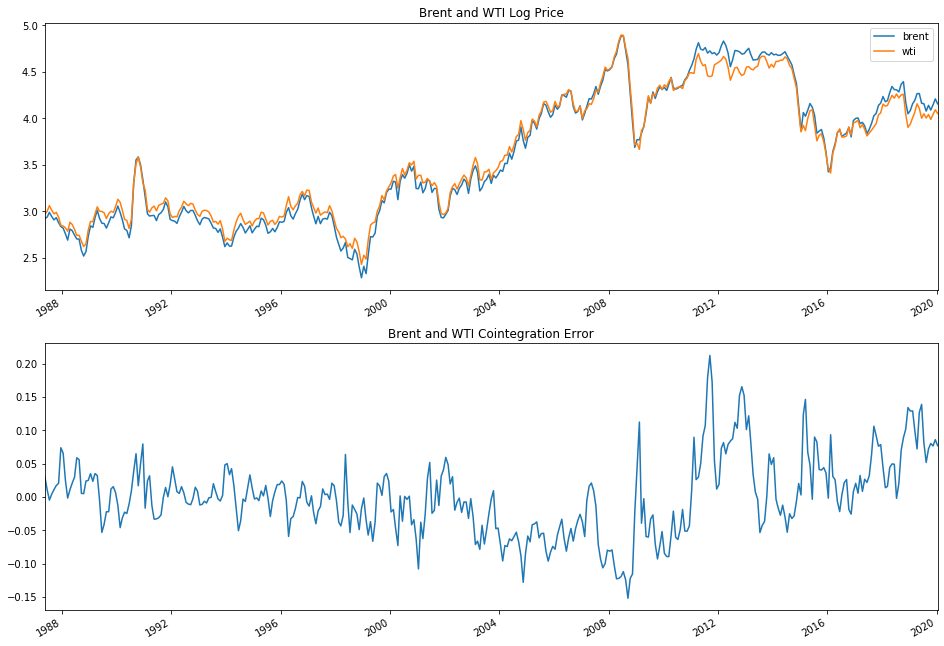

In [31]:
plt.rc("figure", figsize=(16,12))
fig, axes = plt.subplots(2,1) 
ax = oil.plot(ax=axes[0])
ax.set_xlabel(None)
ax.set_title("Brent and WTI Log Price")
xl = ax.set_xlim(oil.index.min(), oil.index.max())
ax = res.resid.plot(ax=axes[1])
ax.set_title("Brent and WTI Cointegration Error")
ax.set_xlim(xl)
_ = ax.set_xlabel(None)
